# MACHINE LEARNING MODEL FOR TRAFFIC SIGN DETECTION

##        CONVOLUTIONAL NEURAL NETWORKS
---

### Project Description
---

Traffic signs have been designed to be easily recognizable by the human brain, however for computer systems this classification continues to present its limitations in the recognition of their patterns.

This project consists of creating a predictive Machine Learning model for the automated recognition of traffic signs.

For our objective we are going to compare a traditional Super Vector Machine (SVM) classification model and a model based on convolutional neural networks (CNN), we will be changing its hyperparameters to solve its complexity and make the comparison of its results and the margin of error. that each one of them offers us.

For this study, we will use the data set compiled in real time during more than 10 hours of work by the Group Vision team of the German Traffic Sign Recognition Benchmark (GTSRB).

Finally we will stay with the best prediction result offered to us and we will create a traffic sign detector in images based on Deep Learning.

#### Dataset : 

+   Single-image, multi-class classification problem
+   More than 40 classes
+   More than 50,000 images in total
+   Large, lifelike database

#### Structure

+   The training set archive is structures as follows:
+   One directory per class
+   Each directory contains one CSV file with annotations ("GT-<ClassID>.csv") and the training images
+   Training images are grouped by tracks
+   Each track contains 30 images of one single physical traffic sign

#### Image format

+   The images contain one traffic sign each
+   Images contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches
+   Images are stored in PPM format (Portable Pixmap, P6)
+   Image sizes vary between 15x15 to 250x250 pixels
+   Images are not necessarily squared
+   The actual traffic sign is not necessarily centered within the image.This is true for images that were close to the image border in the full camera image
+   The bounding box of the traffic sign is part of the annotatinos (see below)


#### Keywords:
+   Artificial vision,
+   Deep Learning,
+   Object Detection,
+   Supervised Learning,
+   Neural Networks.

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np 
#path, own modules
from utils import folders_tb as f
from utils import models as mo

#visualization
from utils import visualization_tb as vt
from matplotlib.image import imread
import matplotlib.pyplot as plt

#path
import os
from os import listdir
from os.path import isfile, join

#keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image

#Import libraries for make a keras_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
from tensorflow import keras


#to work with OpenCv library for test data
import cv2 as cv
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
training_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Train.csv")
training_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
test_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
test_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
import seaborn as sns

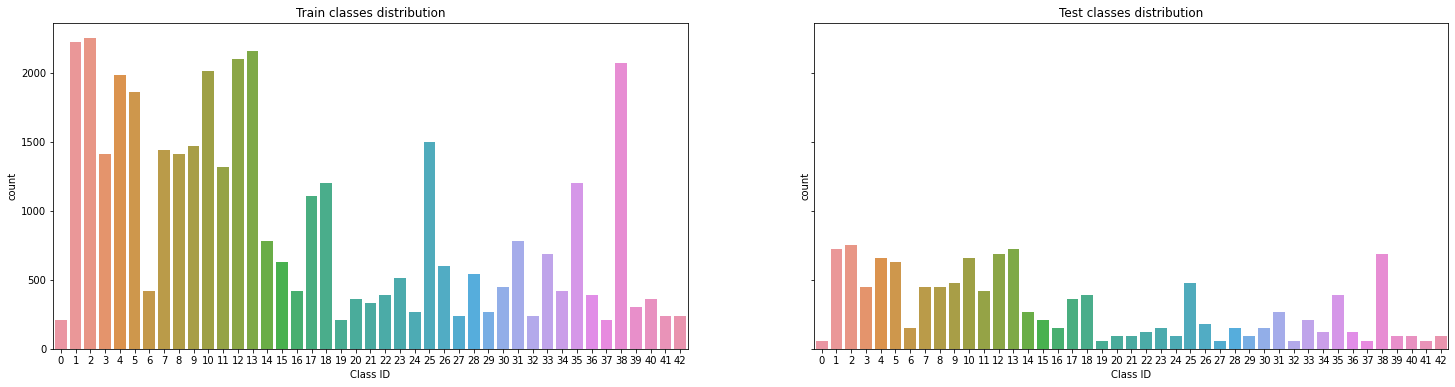

In [6]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6))
axs[0].set_title('Train classes distribution')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[1].set_title('Test classes distribution')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')

sns.countplot(training_set.ClassId, ax=axs[0])
sns.countplot(test_set.ClassId, ax=axs[1])
axs[0].set_xlabel('Class ID');
axs[1].set_xlabel('Class ID');

In [21]:
print("Dataset Training:",training_set.shape)
print("Dataset Test:",test_set.shape)

Dataset Training: (39209, 8)
Dataset Test: (12630, 8)


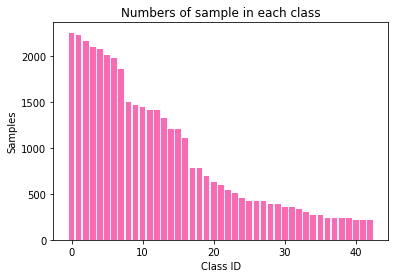

In [22]:
vt.frequency_class(training_set)

## Feature Engineering

#### Pixeles Dimensions

Our data set is made up of images with different pixel sizes, we need to explore them and know what their minimum size is, since to train our model we have to resize the images all to the same size, so we will choose the smallest of the sizes in pixels for each of them.

It has been verified that the smallest dimensions have been 25x26 and 26x27; so we will take as a basis to resize the images to 25x25



In [23]:
pixeles_train = f.pixel_size(training_set,"Width")
pixeles_test = f.pixel_size(test_set,"Width")


In [24]:
pixeles_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
995,25,26,5,6,20,21,38,Test/00995.png
745,25,41,5,6,20,36,17,Test/00745.png
11859,25,27,5,6,20,21,9,Test/11859.png
1477,25,26,5,5,20,21,35,Test/01477.png
10937,25,27,5,5,20,22,8,Test/10937.png


In [25]:
pixeles_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
2970,25,27,5,6,20,21,2,Train/2/00002_00006_00000.png
24457,25,32,5,5,20,27,17,Train/17/00017_00000_00007.png
8010,25,27,5,5,20,22,4,Train/4/00004_00052_00000.png
10560,25,27,5,5,20,22,6,Train/6/00006_00009_00000.png
35461,25,26,5,5,20,21,36,Train/36/00036_00002_00002.png


In [10]:
#aqui tengo que explicar la distribucion de mis cjto de train

In [27]:
data_train = f.curr_path() + os.sep + 'data' + os.sep + "Train" 
data_train

'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\Train'

In [28]:
batch_size = 32
img_height = 30
img_width = 30

data_train = f.curr_path() + os.sep + 'data' + os.sep + "Train" 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=0.25,
  subset="training",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=0.25,
  subset="validation",
  seed=43,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 39209 files belonging to 43 classes.
Using 29407 files for training.
Found 39209 files belonging to 43 classes.
Using 9802 files for validation.


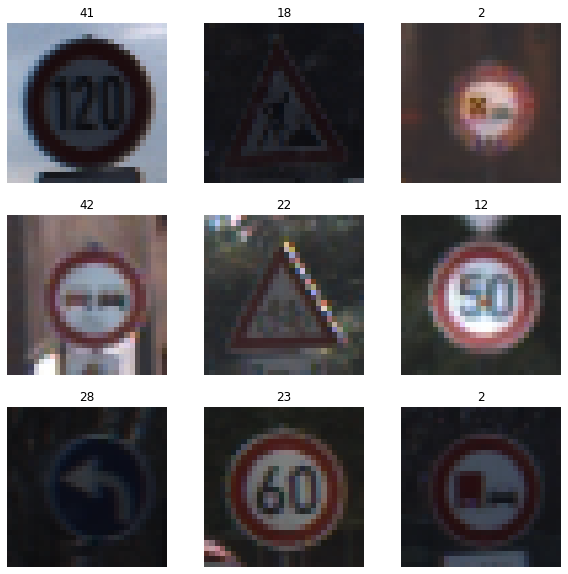

In [29]:
vt.labels_images(train_ds)

In [30]:
vt.images_shape(train_ds)

Images shape for batch: (32, 30, 30, 3)
Shape of label for batch: (32,)
First label batch: tf.Tensor(21, shape=(), dtype=int32)


## Deep Learning:

### Build a model
We start the model with the data_augmentation preprocessor, followed by a Rescaling layer.
We include a Dropout layer before the final classification layer.

In [31]:
model = mo.my_best_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

### Training Model

In [32]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)

In [33]:

model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(train_ds,  batch_size = 128, 
         epochs=10, validation_data = val_ds, verbose=1,callbacks=[callback, reduce_lr])
       

Epoch 1/10
919/919 [==============================] - 107s 116ms/step - loss: 7.7241 - accuracy: 0.6946 - val_loss: 4.2047 - val_accuracy: 0.9192
Epoch 2/10
919/919 [==============================] - 104s 113ms/step - loss: 3.7289 - accuracy: 0.8548 - val_loss: 3.1510 - val_accuracy: 0.9312
Epoch 3/10
919/919 [==============================] - 104s 113ms/step - loss: 2.9289 - accuracy: 0.8909 - val_loss: 2.6669 - val_accuracy: 0.9294
Epoch 4/10
919/919 [==============================] - 104s 113ms/step - loss: 2.5954 - accuracy: 0.8989 - val_loss: 2.3697 - val_accuracy: 0.9291
Epoch 5/10
919/919 [==============================] - 105s 114ms/step - loss: 2.5226 - accuracy: 0.9025 - val_loss: 2.3333 - val_accuracy: 0.9225
Epoch 6/10
919/919 [==============================] - 102s 111ms/step - loss: 2.2114 - accuracy: 0.9171 - val_loss: 2.2561 - val_accuracy: 0.9315
Epoch 7/10
919/919 [==============================] - 102s 111ms/step - loss: 2.1307 - accuracy: 0.9169 - val_loss: 2.4920 -

In [58]:
model.save('../models/my_bestmodel.h5')

### Data Test

para el conjunto test se va utilizar la libreria OpenCv ya que con keras no puedo llegar hasta ellas ya que no se trata de clases almacenadas en carpetas, sino solo de imagenes para realizar el test.

In [83]:
path = os.getcwd()
path_up = os.path.dirname(path)#esto me lleva hasta carpeta project
sep = os.sep
path_up_test = path_up +sep +'data'+ sep + 'Test'+ sep
path_up_test


'c:\\Users\\Karina\\Desktop\\data_science_apr_2021\\machine_learning_project\\project\\data\\Test\\'

In [88]:
nombre_imag = [f for f in listdir(path_up_test) if isfile(join(path_up_test, f))]

df_dict = []

for x in nombre_imag:
    if ".png" in x:
        imagen_pathfull =path_up_test + x  #ruta completa a cada una de las imagenes
        imagen_toarray = cv.imread(imagen_pathfull)
        imagen_resize = cv.resize(imagen_toarray,(30,30))
        df_dict.append({"Imagen_test":imagen_resize})

df = pd.DataFrame(df_dict)
df.head()
     

,Imagen_test
0,"[[[175, 139, 116], [171, 137, 116], [173, 138,..."
1,"[[[61, 71, 60], [62, 80, 89], [64, 81, 92], [6..."
2,"[[[38, 40, 52], [37, 39, 51], [37, 38, 50], [3..."
3,"[[[87, 125, 132], [57, 88, 96], [30, 71, 80], ..."
4,"[[[30, 33, 37], [33, 38, 42], [36, 40, 46], [3..."


In [89]:
test_set.head()  #quiero juntar la ruta redimensionada que sera mi x_test y mi y_pred sera la ClassId

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [90]:
df_test = pd.concat([test_set, df], axis=1)
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Imagen_test
0,53,54,6,5,48,49,16,Test/00000.png,"[[[175, 139, 116], [171, 137, 116], [173, 138,..."
1,42,45,5,5,36,40,1,Test/00001.png,"[[[61, 71, 60], [62, 80, 89], [64, 81, 92], [6..."
2,48,52,6,6,43,47,38,Test/00002.png,"[[[38, 40, 52], [37, 39, 51], [37, 38, 50], [3..."
3,27,29,5,5,22,24,33,Test/00003.png,"[[[87, 125, 132], [57, 88, 96], [30, 71, 80], ..."
4,60,57,5,5,55,52,11,Test/00004.png,"[[[30, 33, 37], [33, 38, 42], [36, 40, 46], [3..."


In [108]:
X  = np.stack(np.array(df_test["Imagen_test"]))
y = df_test["ClassId"].values

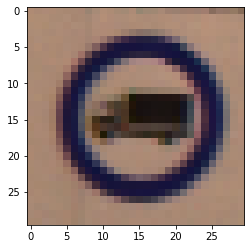

In [109]:
img = Image.fromarray(X[0])
plt.imshow(img)
plt.show()

In [110]:
print(X.shape)
print(y.shape)

(12630, 30, 30, 3)
(12630,)


In [111]:
prueba_final = keras.models.load_model('../models/my_bestmodel.h5')

In [112]:
prueba_final.evaluate(X,y)

395/395 [==============================] - 10s 24ms/step - loss: 20.5411 - accuracy: 0.0561


[20.541067123413086, 0.05613618344068527]